In [72]:
import nltk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv('../UPDATED_NLP_COURSE/05-Topic-Modeling/npr.csv')
df.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [11]:
df['Article'][0]

'In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31. When President Obama moved to sanction Russia over its alleged interference in the U. S. election just concluded, some Republicans who had long called for similar or more severe measures could scarcely bring themselves to approve. House Speaker Paul Ryan called the Obama measures ”appropriate” but also ”overdue” and ”a prime example of this administration’s ineffective foreign policy that has left America weaker in the eyes of the world.” Other GOP leaders sounded much the same theme. ”[We have] been urging President Obama for years to take strong action to deter Russia’s worldwide aggression, including its   operations,” wrote Rep. Devin Nunes,  . chairman of the House Intelligence Committee. ”Now with just a few weeks left in office, the president has suddenly decided that some stronger measures are indeed warranted.” Appearing 

In [12]:
df.isnull().sum()

Article    0
dtype: int64

In [13]:
len(df)

11992

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv=CountVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [16]:
dtm=cv.fit_transform(df['Article'])

In [17]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [20]:
LDA=LatentDirichletAllocation(n_components=7,random_state=42)

In [22]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [29]:
# Grab the vocabulary
lst=cv.get_feature_names()
lst[4000]

'atizado'

In [30]:
len(lst)

54777

In [41]:
import random
lst[random.randint(0,54777)]

'deter'

In [44]:
#Grab topics
topics=LDA.components_
len(topics)

7

In [45]:
topics.shape

(7, 54777)

In [47]:
single_topic=topics[0]

In [53]:
for item in single_topic.argsort()[-10:]:
    print(cv.get_feature_names()[item])

new
percent
government
company
million
care
people
health
said
says


In [59]:
for topic in LDA.components_:
    print("Top 10 Words\n")
    lst=[]
    for item in single_topic.argsort()[-10:]:
        lst.append(cv.get_feature_names()[item])
    print(lst)
    print("\n")

Top 10 Words

['new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


Top 10 Words

['new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


Top 10 Words

['new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


Top 10 Words

['new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


Top 10 Words

['new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


Top 10 Words

['new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


Top 10 Words

['new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']




In [60]:
#
topic_result=LDA.transform(dtm)

In [62]:
topic_result.shape

(11992, 7)

In [69]:
res=[]
for i in range(11992):
    res.append(topic_result[i].argsort()[0])

In [70]:
df['topics']=res
df.head()

,Article,topics
0,"In the Washington of 2016, even when the polic...",3
1,Donald Trump has used Twitter — his prefe...,3
2,Donald Trump is unabashedly praising Russian...,3
3,"Updated at 2:50 p. m. ET, Russian President Vl...",2
4,"From photography, illustration and video, to d...",3


In [71]:
df['topics'].value_counts()

0    1910
3    1902
1    1861
4    1798
2    1696
5    1450
6    1375
Name: topics, dtype: int64

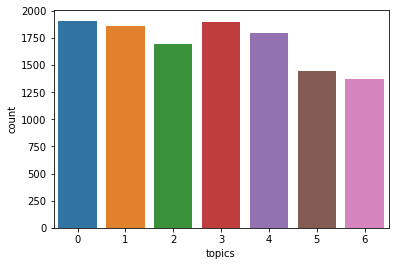

In [73]:
sns.countplot(df['topics'])